# CSL558: Machine Learning

Instructor : [Dr. Chandra Prakash]

For more information visit the class website (https://cprakash86.wordpress.com/ml/)

# Assignment 8:

**Due Date: 7-March-2021**

**Student Name: Rohit Byas sherwan**


## Assignment Instructions

You must save your as Assignment_NO_Yourname

### Agenda for the Assignment 8

1. Understand the working of the Linear Regression :

2. Tradition Machine Learning Techniques :

Your source file will most likely end in .pynb if you are using a Jupyter notebook; however, it might also end
in .py if you are using a Python script.

You have to add your name and roll no in the Google Colab Instructions section below and print it.

### Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.

In [1]:
try:
 from google.colab import drive
 %tensorflow_version 2.x
 COLAB = True
 print("Assignment 8")
 print("Note: using Google CoLab")
except:
 print("Assignment 8")
 print("Note: not using Google CoLab")
 COLAB = False

# Print your name and Roll No.
print('rohit byas ')
print('181210043')
# Print the curent time 
import datetime
print(datetime.datetime.now())

Assignment 8
Note: using Google CoLab
Rohit byas 
181210043
2021-03-14 17:02:23.763941


In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

## Part A: Linear Regression from scratch

### Task 1:  Derive the equations for regression on the slide no 29, Regression.pdf 

#### Upload your handwritten file as PDF


In [7]:
## Submission Status over Microsoft [ Yes/No]
print('Yes')

Yes


In [8]:
# Write a function for the caluclate the cost
def calculate_cost(slope, intercept, data):
    
    # from data extract features and target values
    X = np.array([i[0] for i in data])
    y = np.array([i[1] for i in data])
    m = X.shape[0]
    h = X*slope + intercept
    
    # calculate the final cost
    total_cost = (1/(2*m))*(np.sum(np.square(h-y)))
    
    return total_cost

In [9]:
# Write a function for the caluclate the slope
def calculate_slope(slope, y_intercept, data,learning_rate):
    # extract all the features and target values from data
    X = np.array([i[0] for i in data])
    y = np.array([i[1] for i in data])
    m = X.shape[0]  
    h = X*slope + y_intercept
    # Slope of the line is getting updated below
    slope = slope - learning_rate*(1/m)* np.sum((h-y)*X)
    # returning the updated slope
    return slope

In [10]:
# Write a function for the caluclate the slope
def calculate_intercept(slope, y_intercept, data,learning_rate):
    # from data extracting features and target values
    X = np.array([i[0] for i in data])
    y = np.array([i[1] for i in data])
    # size of data
    m = X.shape[0]
    # hypothesis
    h = X*slope + y_intercept
    
    # updating the y_intercept
    y_intercept = y_intercept - learning_rate*(1/m)* np.sum((h-y))

    return y_intercept

In [11]:
# Generate data randomely
data=[]
for x in range(111):
    data.append((x,x))
slope=0
y_intercept=0
cost=calculate_cost(slope, y_intercept, data)
print(cost)

NameError: ignored

In [12]:
learning_rate=0.00001
previous_cost=cost+1

# we can train data for 50 iteration
iterations = 50
while iterations>0 : #TODO:
    iterations-=1

    new_slope=calculate_slope(slope, y_intercept, data,learning_rate)
    new_y_intercept=calculate_intercept(slope, y_intercept, data,learning_rate)
    previous_cost=cost
    slope=new_slope
    y_intercept=new_y_intercept
    cost=calculate_cost(slope, y_intercept, data)
print('cost:',cost)
print('slope:',slope)
print('y_intercept:',y_intercept)

NameError: ignored

## PART B : Logistic Regression

Logistic regression is used when the response variable is categorical in nature. The name is taken from the
linear regression only. The logistic term is used because it uses the logistic function as tranfer function.

Linear regression is suitable for predicting output that is continuous value, such as predicting the price of a
property. Its prediction output can be any real number, range from negative infinity to infinity. The regression
line is generally a straight line.

Whereas logistic regression is for classification problems, which predicts a probability range between 0 to 1.
For example, predict whether a customer will make a purchase or not. The regression line is a sigmoid curve.

Why linear regression is not suitable for Classification:
- the predicted value is continuous, not probabilistic

- Sensitive to imbalance data when using linear regression for classification

Probalistic model in Linear regression is Gaussian while in Logistic regression is binomial distribution

3 steps in Logistic Regression
1. Sigmoid Function
2. Cost Function / Loss function
3. Gradient Descent

In [ ]:
# 1. Sigmoid Function
def sigmoid(x):

    return 1/(1 + np.exp(-x)) 

In [ ]:
#2 Cost Function - Write a function for the caluclate the cost
def compute_cost(X, y, theta):
    
    # data size
    m = X.shape[0]
    
    # hypothesis function
    h = sigmoid(X @ theta)
    
    # final cost
    cost = -1*(1/m)*(y.T@np.log(h)+(1-y).T@np.log(1-h))
    
    return cost

In [ ]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))
    # using for loops on iterations
    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

In [ ]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

In [ ]:
?make_classification

In [ ]:
# Generating artificail data sets
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis]

init shape of X (500, 2)
after padding shape of X (500, 3)
shape of parms (3, 1)
shape of y (500, 1)
Initial Cost is: [[0.69314718]] 

Optimal Parameters are: 
 [[-0.45293068]
 [ 3.26552327]
 [ 0.03334871]] 



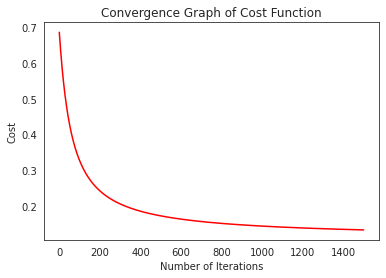

In [ ]:
m = len(y)

print(f"init shape of X {X.shape}")
X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
params = np.zeros((n,1))
print(f"after padding shape of X {X.shape}")
print(f"shape of parms {params.shape}")
print(f"shape of y {y.shape}")

iterations = 1500
learning_rate = 0.03

initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [ ]:
y_pred = predict(X, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))
print(score)

0.966


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


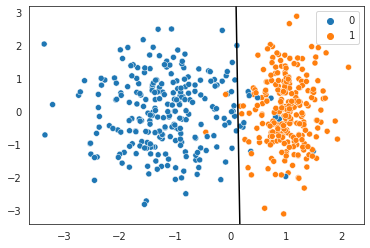

In [ ]:
slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])
sns.set_style('white')
sns.scatterplot(X[:,1],X[:,2],hue=y.reshape(-1));
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");

## PART C : Traditional ML Techniques over MNIT Gait Dataset

Take the filtered Gait Dataset from the Assignment 4. You need to apply the traditional ML techniques for the
analysis of the this dataset.

Objective 1: Predict the age from the rest of features in the dataset in [Task 2] .

Objective 2: Identify the gender from the rest of the features in the dataset in [Task 3] .

Objective 3: Predict the knee angle for the next gait cycle [Task 4] .

### Task 1: Data reading and package setup

1. Read Analysis_MNIT_database.xlsx. and import the packages

In [ ]:
# importing general libraries for data analytics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

In [ ]:
# reading the dataset from Analysis_MNIT.xlsx
df = pd.read_excel('Analysis_MNIT.xlsx')
df.drop(columns=[df.columns[0]], inplace=True)

df

,Subject #,Age (Year),Height (m),Weight (Kg),BMI,Leg Length (m),Thigh Length (m),Calf Length,Mallelous height -L,Foot Length (cM),Shoe No,Waist width (inches),Bi-illiac width (m),Gender_0,Gender_1
0,S21,30,1.740,61.0,20.147972,0.930,0.52,0.410,0.078103,0.260,8,31.0,0.79,0,1
1,S22,27,1.855,65.9,19.151270,1.095,0.56,0.535,0.078103,0.274,11,32.0,0.81,0,1
2,S23,27,1.570,62.1,25.193720,0.815,0.46,0.355,0.517500,0.235,5,34.0,0.87,1,0
3,S24,22,1.580,59.5,23.834321,0.830,0.49,0.340,0.076000,0.240,7,30.0,0.76,1,0
4,S25,20,1.740,80.0,26.423570,0.840,0.47,0.370,0.078103,0.240,8,34.0,0.87,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,S130,25,1.670,62.0,22.230987,0.980,0.49,0.490,0.070000,0.250,8,32.0,0.81,0,1
110,S131,28,1.700,68.0,23.529412,0.880,0.49,0.390,0.070000,0.250,7,30.0,0.76,0,1
111,S132,55,1.670,62.3,22.338556,0.900,0.49,0.410,0.059000,0.260,8,32.0,0.81,0,1
112,S133,42,1.680,60.2,21.329365,0.940,0.55,0.390,0.059000,0.250,7,36.0,0.92,0,1


In [ ]:
# describing data set
df.describe()

,Age (Year),Height (m),Weight (Kg),BMI,Leg Length (m),Thigh Length (m),Calf Length,Mallelous height -L,Foot Length (cM),Shoe No,Waist width (inches),Bi-illiac width (m),Gender_0,Gender_1
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,28.096491,1.681886,66.992982,23.495783,0.885263,0.480395,0.394474,0.110439,0.251346,7.675439,32.881579,0.834386,0.245614,0.754386
std,8.831730,0.110621,14.417171,3.822484,0.066980,0.042552,0.079641,0.119804,0.019723,1.669591,3.038326,0.080924,0.432351,0.432351
min,4.000000,0.970000,13.200000,13.960249,0.490000,0.300000,0.000000,0.059000,0.160000,1.000000,22.000000,0.480000,0.000000,0.000000
25%,23.000000,1.640000,59.200000,20.881610,0.852500,0.450000,0.380000,0.070000,0.240000,7.000000,31.000000,0.790000,0.000000,1.000000
50%,27.000000,1.695000,66.100000,23.474817,0.890000,0.485000,0.400000,0.070000,0.250000,8.000000,32.000000,0.810000,0.000000,1.000000
75%,31.000000,1.740000,75.075000,25.350782,0.920000,0.510000,0.430000,0.078103,0.265000,9.000000,35.000000,0.890000,0.000000,1.000000
max,57.000000,1.930000,132.500000,35.571425,1.095000,0.600000,0.535000,0.517500,0.310000,12.000000,40.000000,1.020000,1.000000,1.000000


### Task 2: Regression

Perform the Objective 1:

In [ ]:
# We need to create features and target array
X = df[df.columns[2:]].to_numpy()
y = df[[df.columns[1]]].to_numpy()

In [ ]:
# Dataset are getting splitted into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, t_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((91, 13), (23, 13), (91, 1), (23, 1))

In [ ]:
# Crerating the regressor object of LinearRegression class
r=LinearRegression()
r.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# regressor's intercept and coeffcient
r.intercept_, r.coef_

(array([-25.27270289]),
 array([[-44.40421244,  -0.21959502,   0.63534084,  77.50567941,
          10.03881382, -13.65059126,  -6.55436642, 106.91249275,
          -2.10666205,  -2.40775161, 152.12934878,  -4.41536348,
           4.41536348]]))

In [ ]:
# For Testing
y_predict=regressor.predict(x_test)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape, y_predict.shape

((91, 13), (23, 13), (91, 1), (23, 1), (23, 1))

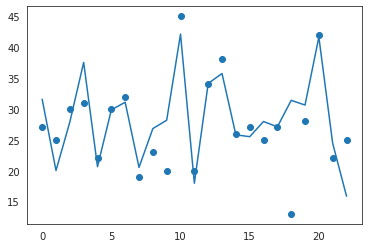

In [ ]:
plt.scatter([i for i in range(len(x_test))], y_test)
plt.plot(y_predict)

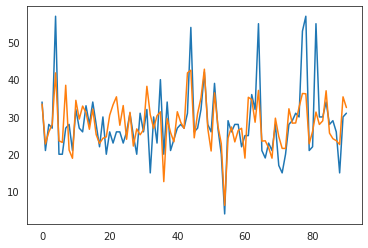

In [ ]:
# ploting ytrain and xtrain
plt.plot(y_train)
plt.plot(r.predict(x_train))

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 3.43953471218567
Mean Squared Error: 27.91292312491641
Root Mean Squared Error: 5.283268223828543


### Task 3: Logistic Regression

In [ ]:
X = df[df.columns[1:-2]].to_numpy()
y = df[[df.columns[-1]]].to_numpy().squeeze()

In [ ]:
train_data,t_data, train_label, t_lable = train_test_split(X,y,t_size=0.20)

In [ ]:
# crerating the regressor object of LogisticRegression class with 500 iteration
r= LogisticRegression(max_iter=500)

# fitting the model with data
r.fit(train_data, train_label)

# predicting model's performancce on test data
p_t_lable=r.predict(t_data)

In [ ]:
confusion_matrix= metrics.confusion_matrix(t_lable, p_t_lable)
confusion_matrix

array([[ 5,  1],
       [ 3, 14]])

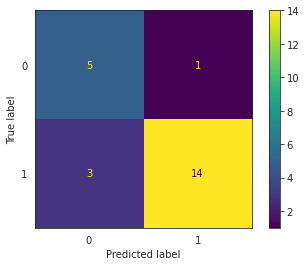

In [ ]:
plot_confusion_matrix(regressor, t_data, t_lable)

In [ ]:
print("Accuracy:",metrics.accuracy_score(t_lable, p_t_lable))
print("Precision:",metrics.precision_score(t_lable, p_t_lable))
print("Recall:",metrics.recall_score(t_lable, p_t_lable))

Accuracy: 0.8260869565217391
Precision: 0.9333333333333333
Recall: 0.8235294117647058


Observations:
1. Learnt about Linear and Multiple regression
2. Learnt about different types of errors and their usage
3. Learnt why we use logistic reasoning
4. Learnt about importance of precision and recall value in confusion matrix